In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# EDA

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('data')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
df['EmployeeID'].nunique(), df['MaritalStatus'].value_counts(), df['Over18'].value_counts()

(4410,
 MaritalStatus
 Married     2019
 Single      1410
 Divorced     981
 Name: count, dtype: int64,
 Over18
 Y    4410
 Name: count, dtype: int64)

In [ ]:
df = pd.read_csv('data', index_col='EmployeeID')
df
# 'Attrition' as 0/1, 'Gender' as 0/1, 'MaritalStatus' as 0/1/2 can be change

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                   4410

In [ ]:
df.describe().T
# 'EmployeeCount', 'StandardHours', 'Over18' can be drop

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
StockOptionLevel,4410.0,0.793878,0.851883,0.0,0.0,1.0,1.0,3.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
NumCompaniesWorked,19
TotalWorkingYears,9
Age,0
MonthlyIncome,0
YearsSinceLastPromotion,0
YearsAtCompany,0
TrainingTimesLastYear,0
StockOptionLevel,0
StandardHours,0
PercentSalaryHike,0


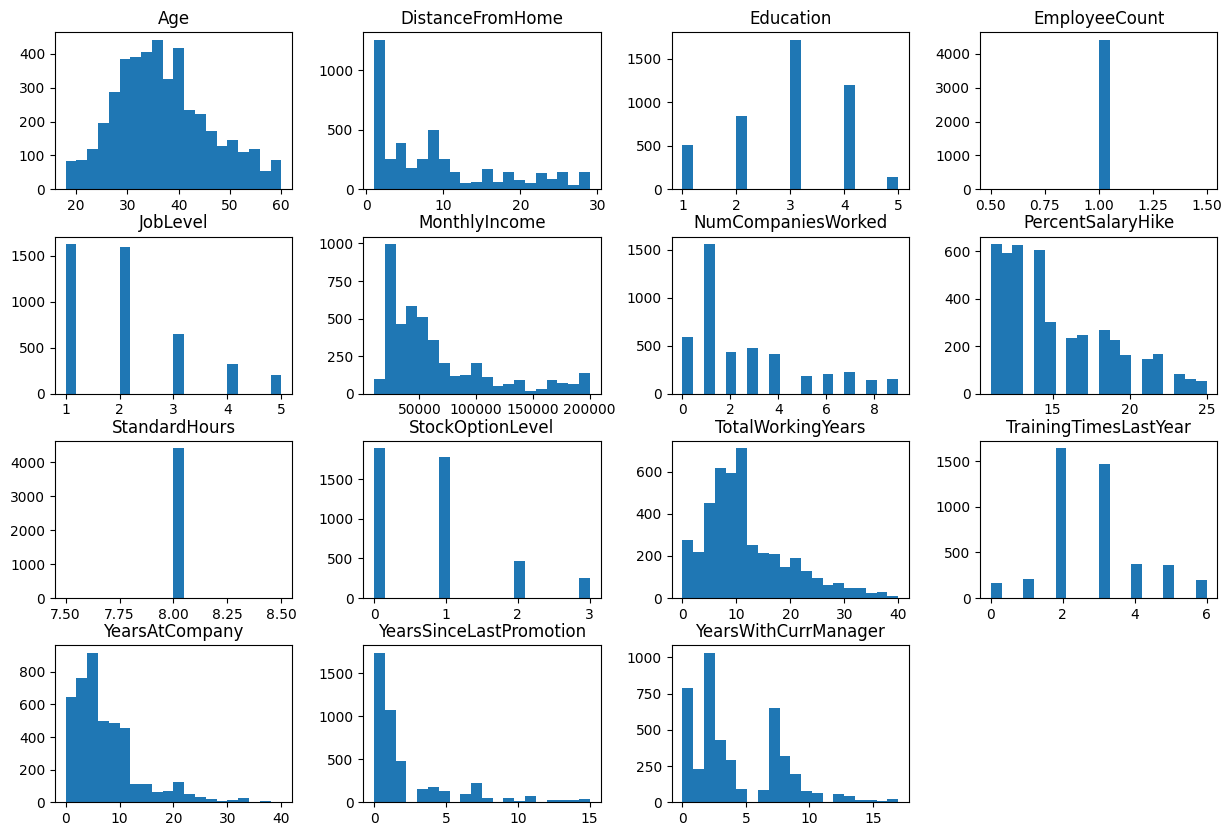

In [ ]:
df.hist(grid=False, bins=20, figsize=(15, 10));

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['Attrition'] = df_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_copy['Gender'] = df_copy['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

marital_status = {'Married':0, 'Single':1, 'Divorced':2}
df_copy['MaritalStatus'] = df_copy['MaritalStatus'].apply(lambda x: marital_status[x])

df_copy

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,
1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,Healthcare Representative,0,131160,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,1,1,Research Scientist,1,41890,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,0,Travel_Frequently,Research & Development,17,4,Other,1,0,4,Sales Executive,0,193280,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,0,3,Human Resources,0,83210,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,0,1,Sales Executive,1,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,1,1,Research Scientist,1,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4407,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,0,1,Laboratory Technician,2,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4408,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,0,2,Sales Executive,0,37020,0.0,Y,20,8,0,5.0,4,4,1,2


In [ ]:
df_copy = df_copy.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
df_copy

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Healthcare Representative,0,131160,1.0,11,0,1.0,6,1,0,0
2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,1,Research Scientist,1,41890,0.0,23,1,6.0,3,5,1,4
3,32,0,Travel_Frequently,Research & Development,17,4,Other,0,4,Sales Executive,0,193280,1.0,15,3,5.0,2,5,0,3
4,38,0,Non-Travel,Research & Development,2,5,Life Sciences,0,3,Human Resources,0,83210,3.0,11,3,13.0,5,8,7,5
5,32,0,Travel_Rarely,Research & Development,10,1,Medical,0,1,Sales Executive,1,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,1,Research Scientist,1,60290,3.0,17,1,10.0,5,3,0,2
4407,29,0,Travel_Rarely,Research & Development,2,4,Medical,0,1,Laboratory Technician,2,26790,2.0,15,0,10.0,2,3,0,2
4408,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,0,2,Sales Executive,0,37020,0.0,20,0,5.0,4,4,1,2


In [ ]:
round(df_copy['Attrition'].value_counts()[1]/len(df_copy), 2)*100
# Employee rate for left the company

16.0

In [ ]:
df_copy[df_copy['Attrition']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3699.0,37.561233,8.885956,18.0,31.0,36.0,43.0,60.0
Attrition,3699.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DistanceFromHome,3699.0,9.227088,8.167978,1.0,2.0,7.0,14.0,29.0
Education,3699.0,2.919708,1.025784,1.0,2.0,3.0,4.0,5.0
Gender,3699.0,0.403893,0.490743,0.0,0.0,0.0,1.0,1.0
JobLevel,3699.0,2.068938,1.115967,1.0,1.0,2.0,3.0,5.0
MaritalStatus,3699.0,0.760746,0.811835,0.0,0.0,1.0,1.0,2.0
MonthlyIncome,3699.0,65672.595296,47472.814021,10510.0,29360.0,49300.0,86060.0,199990.0
NumCompaniesWorked,3684.0,2.648480,2.460537,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,3699.0,15.157340,3.634551,11.0,12.0,14.0,18.0,25.0


In [ ]:
df_copy[df_copy['Attrition']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,711.0,33.607595,9.675693,18.0,28.0,32.0,39.0,58.0
Attrition,711.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DistanceFromHome,711.0,9.012658,7.772368,1.0,2.0,7.0,15.0,29.0
Education,711.0,2.877637,1.014233,1.0,2.0,3.0,4.0,5.0
Gender,711.0,0.379747,0.485665,0.0,0.0,0.0,1.0,1.0
JobLevel,711.0,2.037975,1.057485,1.0,1.0,2.0,2.0,5.0
MaritalStatus,711.0,0.784810,0.669324,0.0,0.0,1.0,1.0,2.0
MonthlyIncome,711.0,61682.616034,44792.067695,10090.0,28440.0,49080.0,71040.0,198590.0
NumCompaniesWorked,707.0,2.936351,2.678774,0.0,1.0,1.0,5.0,9.0
PercentSalaryHike,711.0,15.481013,3.775289,11.0,12.0,14.0,18.0,25.0


<Axes: >

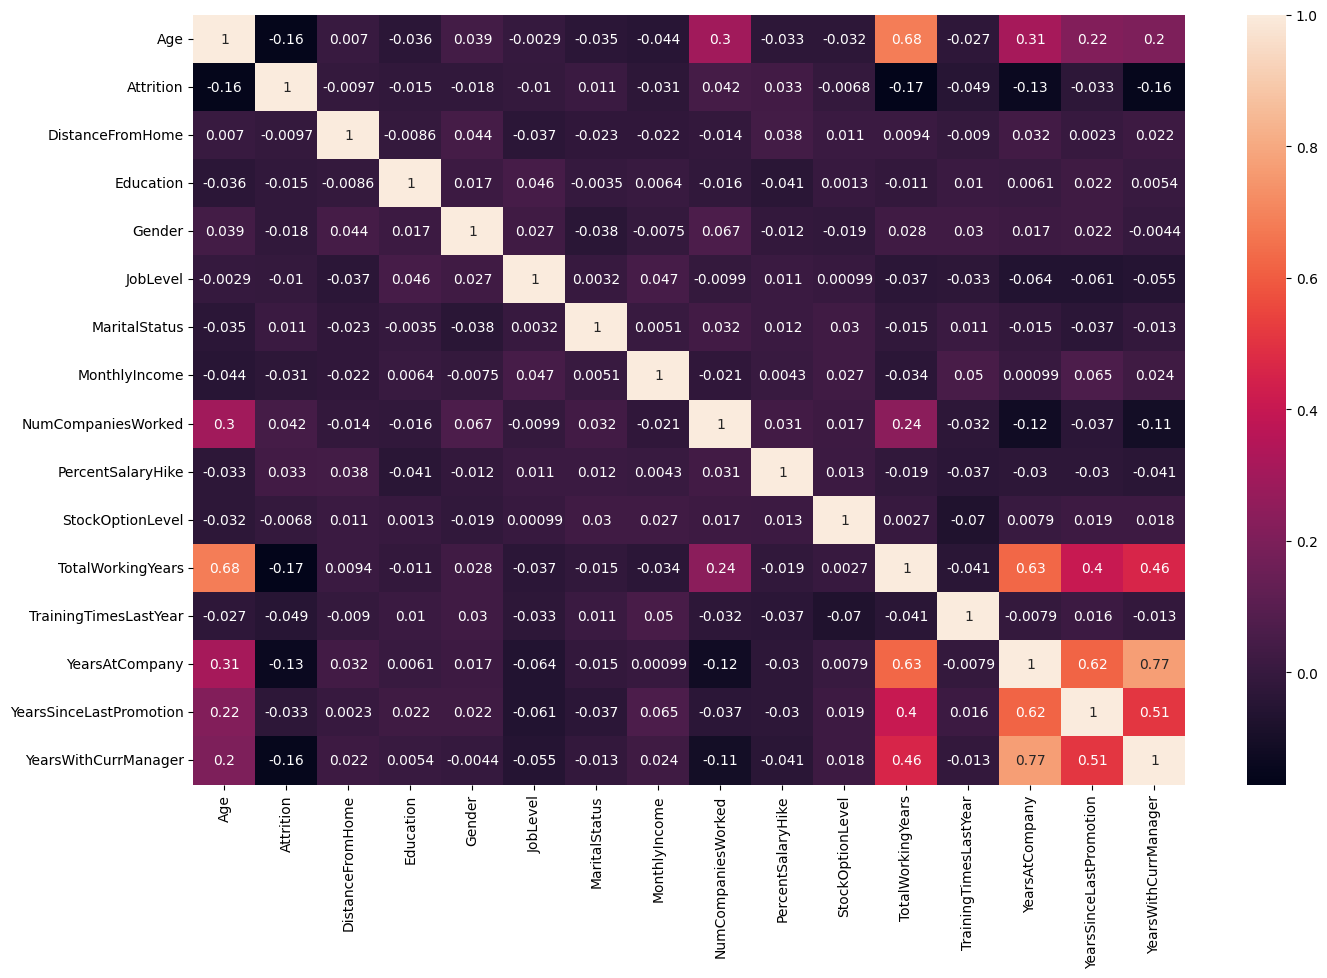

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df_copy.corr(numeric_only=True), annot = True)

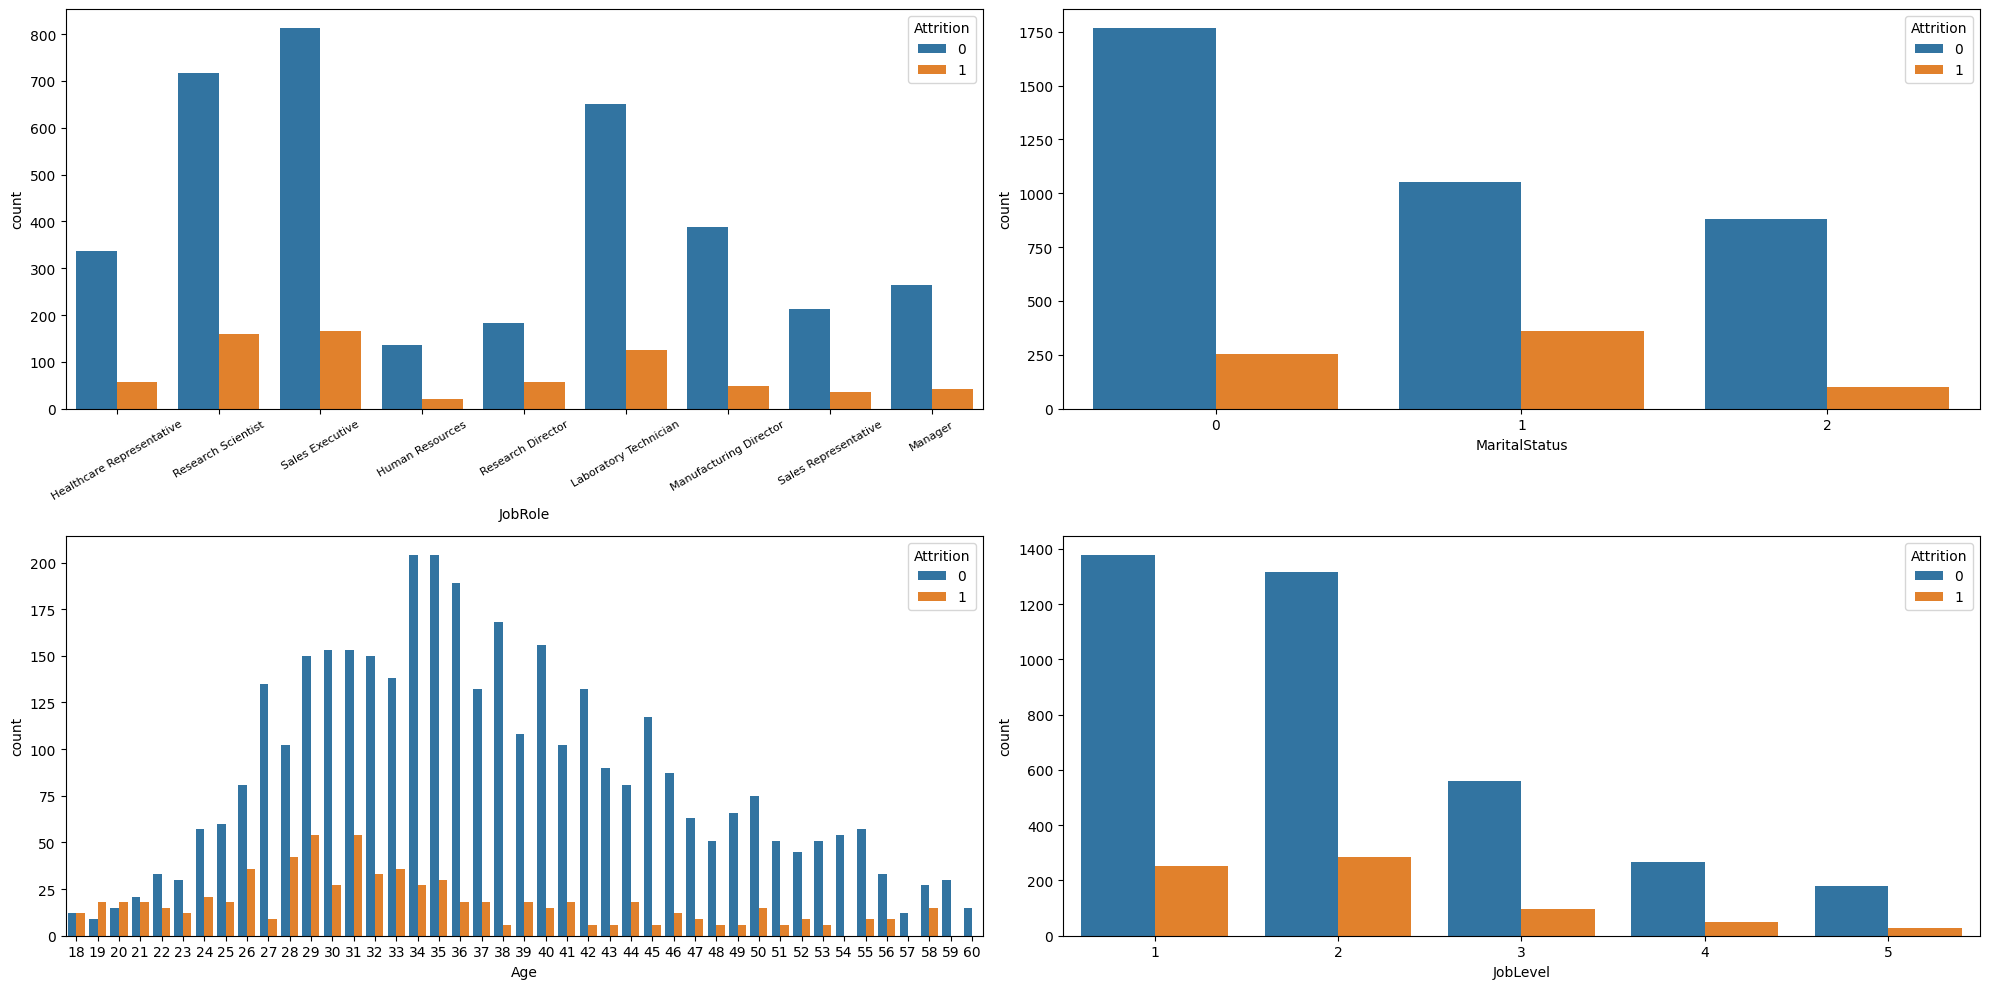

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
plt.xticks(rotation=30, fontsize=8)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df_copy)
plt.subplot(2,2,2)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df_copy)
plt.subplot(2,2,3)
sns.countplot(x = 'Age', hue = 'Attrition', data = df_copy)
plt.subplot(2,2,4)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df_copy)
plt.tight_layout()

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

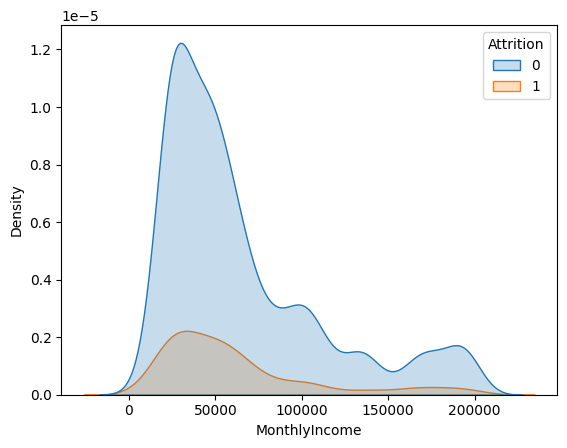

In [ ]:
sns.kdeplot(x='MonthlyIncome', hue = 'Attrition', data=df_copy, fill=True)

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

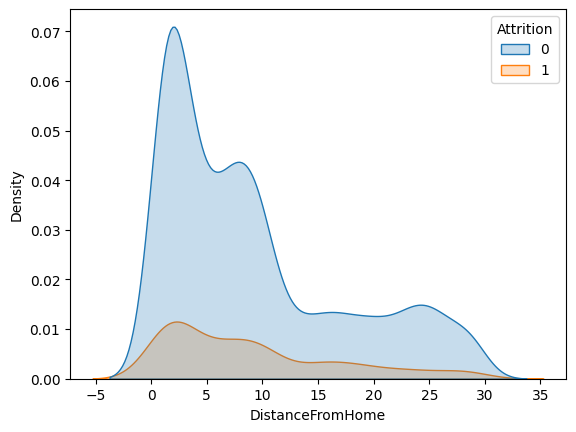

In [ ]:
sns.kdeplot(x='DistanceFromHome', hue = 'Attrition', data=df_copy, fill=True)

# Preprocess

In [ ]:
X = df_copy.drop('Attrition', axis=1)
y = df_copy['Attrition']

In [ ]:
num_cols = [col for col in df_copy.columns if pd.api.types.is_numeric_dtype(df_copy[col]) and col != 'Attrition']
cat_cols = [col for col in df_copy.columns if col not in num_cols and col != 'Attrition']

In [ ]:
len(cat_cols), len(num_cols), len(df_copy.columns)

(4, 15, 20)

In [ ]:
df_copy[cat_cols].nunique()

,0
BusinessTravel,3
Department,3
EducationField,6
JobRole,9


In [ ]:
df_copy['JobRole'].value_counts()

,count
JobRole,
Sales Executive,978
Research Scientist,876
Laboratory Technician,777
Manufacturing Director,435
Healthcare Representative,393
Manager,306
Sales Representative,249
Research Director,240
Human Resources,156


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [ ]:
# 'NumCompaniesWorked' and 'TotalWorkingYears' needs to be filled
imputer = SimpleImputer(strategy="mean")
scaler = MinMaxScaler()
onehot = OneHotEncoder()

num_pipe = Pipeline(steps=[('miss', imputer), ('scale', scaler)])
preprocessor = ColumnTransformer([('numeric', num_pipe, num_cols), ('categorical', onehot, cat_cols)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# X_train_name = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
# X_test_name = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

# Model

In [ ]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Evaluate

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



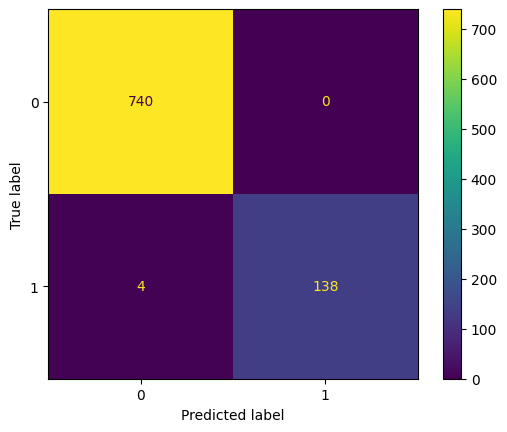

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [ ]:
preprocessor_cv = Pipeline(steps=[('pre', preprocessor), ('model', model)])
cross_val_score(preprocessor_cv, X, y).mean()

0.9997732426303856

In [ ]:
import pickle

pickle.dump(model, open("data", "wb"))